In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.linear_model import SGDClassifier

In [12]:
sc = SGDClassifier(loss = 'log',max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [13]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


In [14]:
#에포크가 진행됨에 따라 모델의 정확도
import numpy as np
sc = SGDClassifier(loss='log',random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [15]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

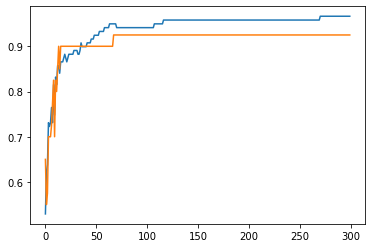

In [16]:
#그래프로 에포크가 진행돔에 따라 달라지는 모델의 정확도 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [17]:
sc = SGDClassifier(loss='log',random_state = 42)

In [20]:
ch_train_score = []
ch_test_score = []
for _ in range(0,3000):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    ch_train_score.append(sc.score(train_scaled,train_target))
    ch_test_score.append(sc.score(test_scaled,test_target))

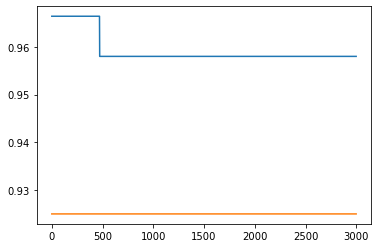

In [21]:
plt.plot(ch_train_score)
plt.plot(ch_test_score)
plt.show()

In [22]:
sc = SGDClassifier(loss = 'log', max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [23]:
#힌지손실을 사용해 같은 반복 횟수 동안 모델을 훈련
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
